# Приведение к стационарному виду

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf

In [ ]:
df = yf.download('AAPL', '2007-01-01', '2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03 00:00:00-05:00,3.081786,3.092143,2.925000,2.992857,2.555397,1238319600
2007-01-04 00:00:00-05:00,3.001786,3.069643,2.993571,3.059286,2.612116,847260400
2007-01-05 00:00:00-05:00,3.063214,3.078571,3.014286,3.037500,2.593514,834741600
2007-01-08 00:00:00-05:00,3.070000,3.090357,3.045714,3.052500,2.606322,797106800
2007-01-09 00:00:00-05:00,3.087500,3.320714,3.041071,3.306071,2.822829,3349298400
...,...,...,...,...,...,...
2020-12-24 00:00:00-05:00,131.320007,133.460007,131.100006,131.970001,130.620911,54930100
2020-12-28 00:00:00-05:00,133.990005,137.339996,133.509995,136.690002,135.292664,124486200
2020-12-29 00:00:00-05:00,138.050003,138.789993,134.339996,134.869995,133.491257,121047300


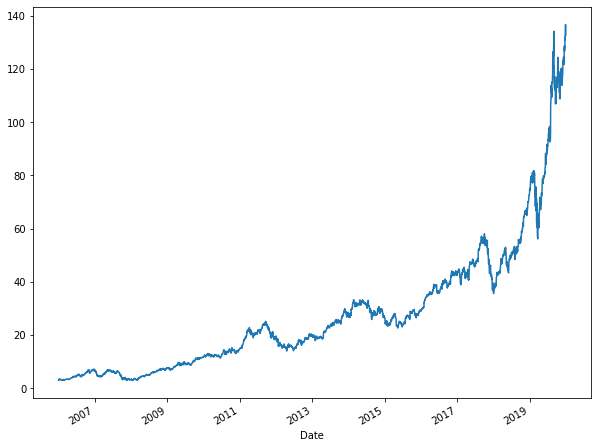

In [ ]:
df.Close.plot(figsize=(10, 8))

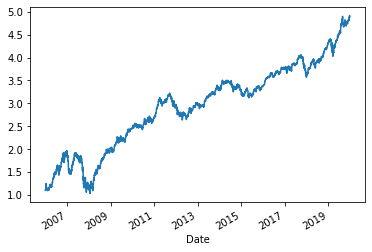

In [ ]:
import numpy as np
np.log(df['Close']).plot()

In [ ]:
df[:2000].describe()

,Open,High,Low,Close,Adj Close,Volume
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,12.099457,12.220210,11.961902,12.094394,10.481052,6.233903e+08
std,7.007148,7.054623,6.954797,7.005319,6.201896,3.942956e+08
min,2.835357,2.928571,2.792857,2.792857,2.384631,9.156720e+07
25%,5.834643,5.930357,5.698660,5.816964,4.966709,3.525256e+08
50%,11.497500,11.561964,11.396607,11.480714,9.802600,5.114844e+08
75%,18.307946,18.516518,18.138035,18.365000,15.957455,7.955892e+08
max,29.817499,29.937500,29.512501,29.750000,26.823723,3.372970e+09


In [ ]:
df[2000:].describe()

,Open,High,Low,Close,Adj Close,Volume
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1.525000e+03
mean,47.902318,48.416728,47.402500,47.931348,46.081509,1.462888e+08
std,25.050499,25.430559,24.638054,25.050498,25.355743,7.155367e+07
min,22.500000,22.917500,22.367500,22.584999,20.949608,4.544800e+07
25%,29.545000,29.825001,29.334999,29.662500,27.328836,9.765440e+07
50%,40.972500,41.537498,40.602501,41.000000,39.127090,1.281680e+08
75%,53.709999,54.487499,53.152500,53.762501,52.009899,1.762184e+08
max,138.050003,138.789993,134.339996,136.690002,135.292648,6.488252e+08


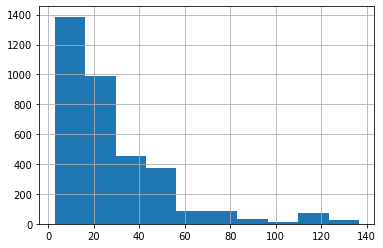

In [ ]:
df.Close.hist()

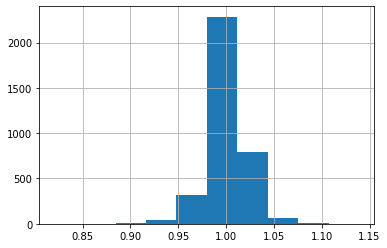

In [ ]:
(df['Close']/df['Close'].shift(1)).hist()

In [ ]:
import pandas as pd

df.index = pd.to_datetime(df.index)

In [ ]:
df = df.asfreq('1d')[-100:]
df.fillna(method='ffill', inplace=True)

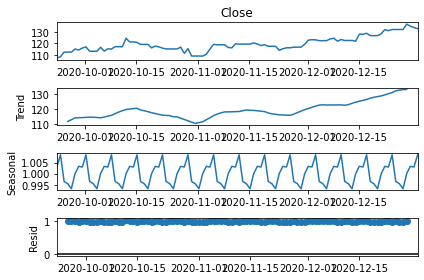

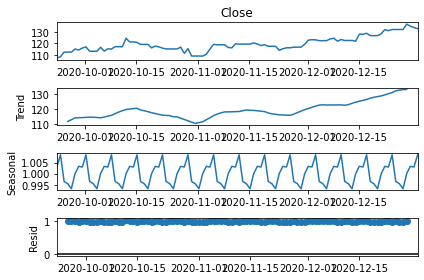

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Close'], model='multiplicative')
result.plot()

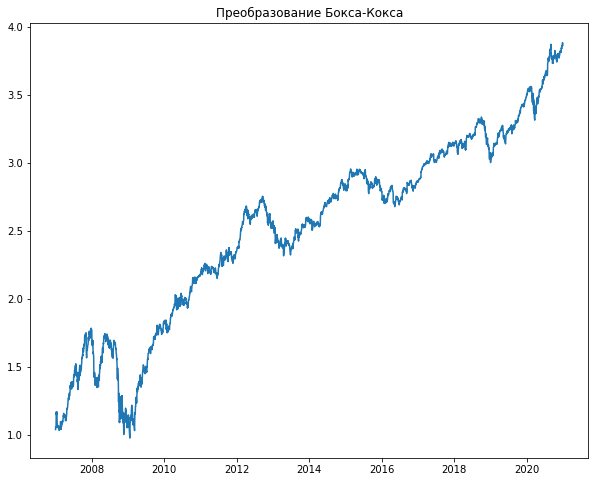

In [ ]:
import matplotlib.pyplot as plt
from scipy.special import boxcox, inv_boxcox

plt.figure(figsize = (10, 8))
plt.title('Преобразование Бокса-Кокса')
plt.plot(boxcox(df['Close'], -0.1))

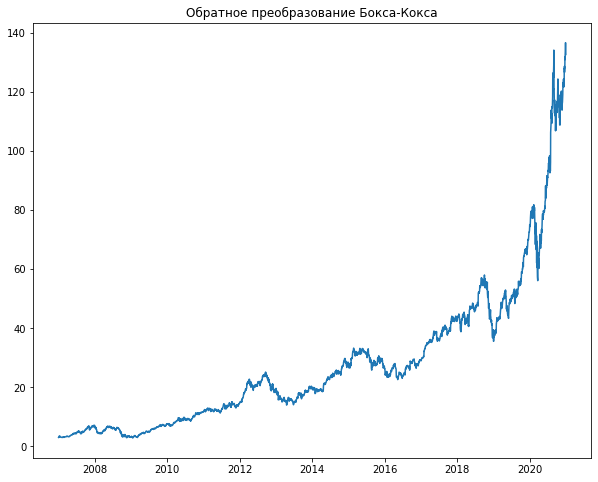

In [ ]:
import matplotlib.pyplot as plt
from scipy.special import boxcox, inv_boxcox

plt.figure(figsize = (10, 8))
plt.title('Обратное преобразование Бокса-Кокса')
plt.plot(inv_boxcox(boxcox(df['Close'], -0.1), -0.1))

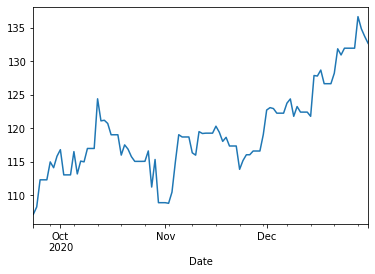

In [ ]:
df.asfreq('1 d').fillna(method = 'ffill')['Close'][-100:].plot()

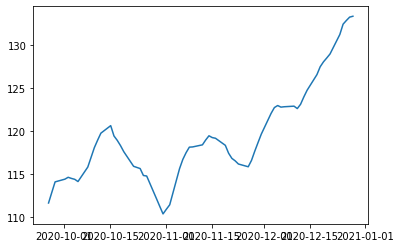

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(df.asfreq('1 d').fillna(method = 'ffill')['Close'][-100:])
plt.plot(decomp.trend)

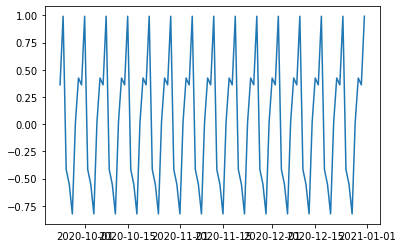

In [ ]:
plt.plot(decomp.seasonal)

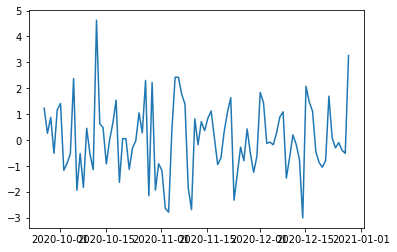

In [ ]:
plt.plot(decomp.resid)

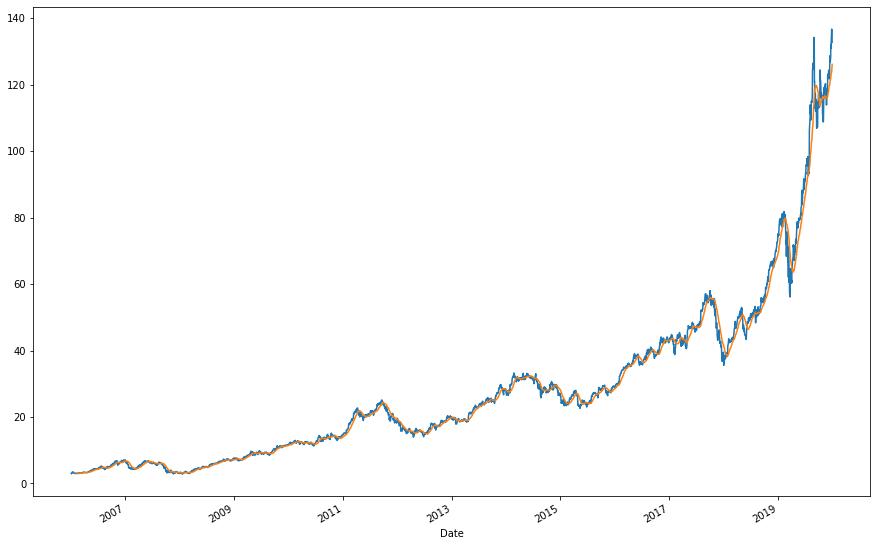

In [ ]:
df['Close'].plot(figsize = (15, 10))
df['Close'].rolling(25).mean().plot()

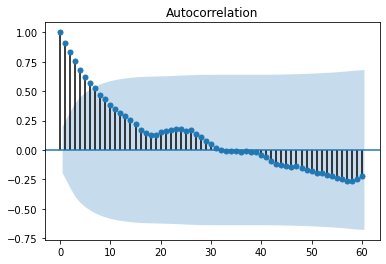

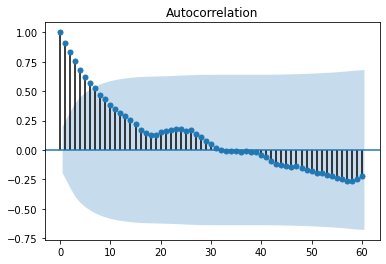

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df.asfreq('1 d').fillna(method = 'ffill')['Close'][-100:], lags=60)

In [ ]:
def weighted(data, weights):
    res = 0
    for n in range(len(weights)):
        res += data[-n-1] * weights[n]
    return res

In [ ]:
weighted(df['Close'][-3:], [0.2, 0.3, 0.6])

147.57599792480468

In [ ]:
def exp_smooth(data, alpha):
    res = [data[0]]
    for n in range(1, len(data)):
        res.append(alpha*data[n] + (1-alpha)*res[n-1])
    return res

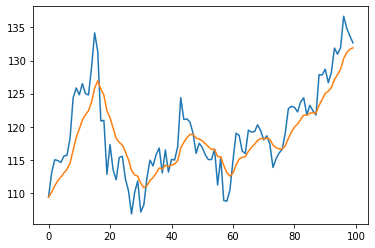

In [ ]:
plt.plot(df['Close'][-100:].values)
plt.plot(exp_smooth(df['Close'][-100:], 0.2))

## Двойное экспоненциальное сглаживание

In [ ]:
def double_exp_smooth(data, alpha, beta):
    res = [data[0]]
    for n in range(1, len(data)):
        if n == 1:
            lev = data[0]
            trend = data[1]-data[0]
        if n>len(data):
            value = res[-1]
        else:
            value = data[n]
        
        last_lev, lev = lev, alpha*value + (1-alpha) * (lev+trend)
        trend = beta*(lev - last_lev) + (1-beta)*trend
        res.append(lev+trend)
    return res

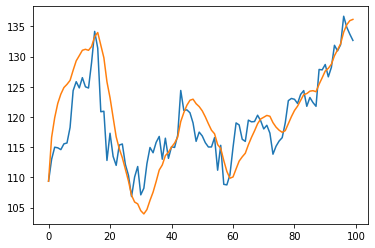

In [ ]:
plt.plot(df['Close'][-100:].values)
plt.plot(double_exp_smooth(df['Close'][-100:], 0.2, 0.2))

# Модель Хольта-Уинтерса (тройное экспоненциальное сглаживание)

Экспоненциальное сглаживание часто используется для решения задачи краткосрочного прогнозирования временных рядов.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.tsa.api as smt

$\ell_x = \alpha(y_x - s_{x-L}) + (1-\alpha)(\ell_{x-1} + b_{x-1})$

$b_x = \beta(\ell_x - \ell_{x-1}) + (1-\beta)b_{x-1}$

$s_x = \gamma(y_x - \ell_x) + (1-\gamma)s_{x-L}$

$\hat{y}_{x+m} = \ell_x + mb_x + s_{x-L+1+(m-1)modL}$

(В примере выше - аддитивная формула, в вариации мультипликативной $\hat{y}_{x+m} = (\ell_x + mb_x)s_{x-L+1+(m-1)modL}$)

Где:

* $\ell_x $ - level, состовляющая уровня ряда. Является средневзвешенным между текущим значением и предыдущими модельными значениями. Экспоненциальность содержится в использовании предыдущего значения модели и компоненте $1- \alpha$.
* $b_x$ - trend, состовляющая тренда ряда. Является взвешенным предыдущих изменений ряда.
* $s_x$ - seasonality, сезонная состовляющая тренда. Определяет колебания вокруг уровня и тренда. Формирует для каждого наблюдения в сезоне создает сезонную компоненту.
* $\alpha$ - вес, сглаживающий фактор. Физический смысл - важность последнего доступного наблюдения. Чем меньше, тем сильнее происходит сглаживание.
* $\beta$ - вес, сглаживающий фактор. Аналогично, чем выше - тем сильнее сглаживает тренд.
* $\gamma$ - вес, сглаживающий фактор. Аналогично, чем выше - тем сильнее сглаживает сезонность.
* $s_{x-L}$ - коэффициент сезонности за тот же период в предыдущем сезоне.
* $\ell_{x-1}$ - сглаженная состовляющая ряда на предыдущем периоде.
* $b_{x-1}$ - значение тренда на предыдущем периоде.
* $y_x$ - текущее значение ряда (последнее доступное).
* $\hat{y}_{x+m}$ - предсказываемое значение ряда.
* $m$ - порядковый номер периода на который делаем прогноз (от последнего текущего)
* $L$ - длина сезона в периодах

Коэффициенты $\alpha, \beta, \gamma$ минимизируются в соответсвии с MSE.

Число $L$ определяется в зависимости от количества сезонов. Ее можно определить визуально, например, недельная сезонность, $L = 7$. Или дневная сезонность $L = 24$. Сезонности могут быть комбинированными - т.е. и дневная и недельная (и любая другая, зависит от вашего типа данных), тогда $L = 24*7$ сезонных компонент. Выбор нужного значения может быть нетривиальной проблемой т.е. данные могут иметь любую комбинацию значений (и шумов), трендов и сезонности. Возможно, у него даже нет некоторых из этих компонентов. Обычно они неизвестны, если вы не проверяете данные вручную и не настраиваете для них модель.

О сезонности:
(Источник Молодежный научно-технический вестник ФС77-51038, ISSN 2307-0609)

Сезонная компонента имеет аддитивную природу в случае, когда с заранее
известным периодом в исходном ряду проявляются достаточно постоянные
периодические отклонения в абсолютном выражении от варьирующегося во времени
среднего уровня ряда. Например, если в июле каждого года предприятие продает на
100.000 единиц больше продукции, чем в другие месяцы года в среднем. Таким образом,
мы могли бы добавить к нашим прогнозам на июль 100.000 единиц, чтобы учесть эти
сезонные колебания.

Если сезонные отклонения от варьирующегося во времени среднего уровня ряда
носят характер достаточно устойчивого относительного изменения, то сезонность имеет
мультипликативную природу. Например, если в ноябре каждого года предприятие
продает на 25% больше продукции, чем в другие месяцы года в среднем. В этом случае
мы могли бы умножить прогноз на ноябрь на 1,25 (индекс сезонности) и таким образом
учесть мультипликативные сезонные колебания. 

Проблема выбора оптимальной сезонности, визуализация: (источник https://orangematter.solarwinds.com/2019/12/15/holt-winters-forecasting-simplified/)

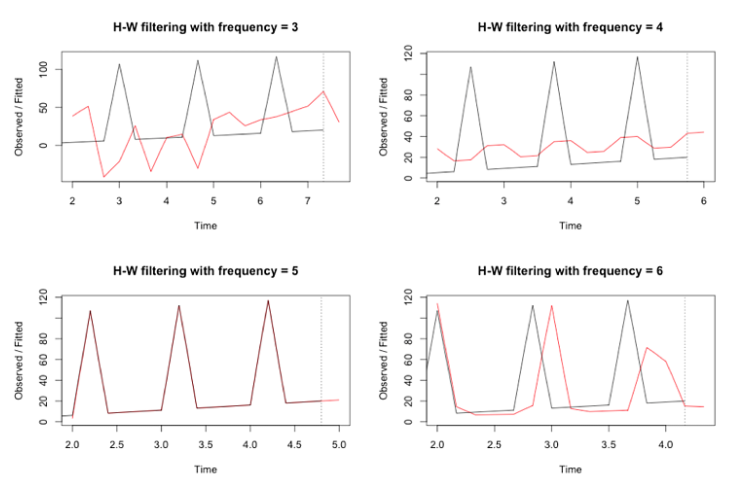

Подбор параметров можно произвести с помощью минимизации MSE, изначально ограничив диапазон поиска (например сглаживающие коэффициенты на 0-1). Например, можно взять метод Truncated Newton conjugate gradient или метод [Nelder-Mead](https://orangematter.solarwinds.com/2018/03/12/numeric-optimization-in-golang-with-nelder-mead-and-gonum/)



При обоих видах сезонности начальное значение уровня $s_0$ представляется целесообразным установить равным среднему арифметическому первого сезона: 

$$s_0 = \sum_{t=1}^L Y_t/L$$

Начальное значение компонента тренда может быть установлен (при обоих видах
сезонности) как в формуле ниже: 

$$b_0 = \frac{1}{L} \left( 
\frac{y_{L+1} - y_1}{L} + \frac{y_{L+2} - y_2}{L} + \cdots + \frac{y_{L+L} - y_L}{L}
\right) \, .$$

Наконец, начальное значение индекса сезонности можно рассчитать с помощью
одного из следующих уравнений в зависимости от природы сезонности: 

* $c_0 = Y_i - S_0, \forall i = 1, 2, \dots , L$ в аддитивном случае
* $c_0 = \frac{Y_i}{S_0}, \forall i = 1, 2, \dots , L$ в мультипликативном случае

In [ ]:
import pandas as pd
df = pd.read_csv('https://dl.uploadgram.me/6213cb751cec3h?raw', index_col=['Date'], parse_dates=['Date'])

In [ ]:
df.head()

,ads
Date,
2017-08-03 00:00:00,49136
2017-08-03 01:00:00,46450
2017-08-03 02:00:00,46355
2017-08-03 03:00:00,43748
2017-08-03 04:00:00,42281


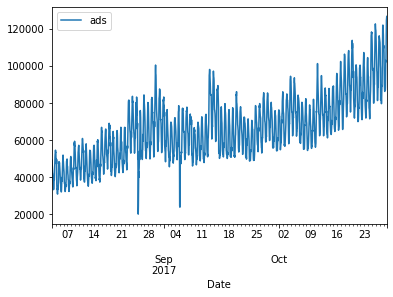

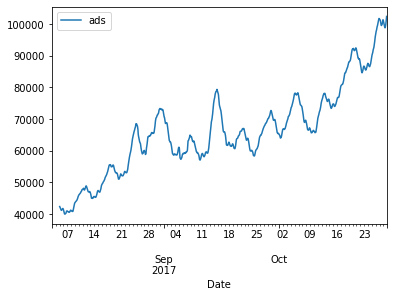

In [ ]:
df.plot()
df.rolling(50).mean().plot()

In [ ]:
def HolterWinter(data, L, alpha, beta, gamma, m):
    # находим изначальные сезонности
    season_num = int(len(data)/L)# кол-во cезонов
    seasonalities = {} # сами сезонности
    season_avgs = [] # их среднее
    # находим сезонное среднее
    season_avgs = [sum(data[L*i: L*i+L])/float(L) for i in range(season_num)]
    # находим начальные значения cезонности
    for i in range(L):
        avg_over_summ = 0.0
        for j in range(season_num):
            avg_over_summ += data[L*j+i] - season_avgs[j]
        seasonalities[i] = avg_over_summ / season_num
    # инициализируем массивы результирующих прогнозов, сгалженных, сезонных и трендовых (нужны в формулах на пред шагах)
    result = []
    smooth = []
    season = []
    trend = []
    # пройдемся по всем данным + длинна предсказания m
    for i in range(len(data) + m):
        # инициализируем значения шага 0
        if i==0:
            smooth_val = data[0] # первое значения сглаживания
            trend_val = sum([(float(data[i+L] - data[i]) / L) for i in range(L)]) / L # первое значения тренда
            result.append(data[0]) # первая точка данных совпадает с исходной
            smooth.append(smooth_val) # добавляем первое значение сглаживание в массив трендов
            trend.append(trend_val) # добавляем первое значение тренда в массив трендов
            season.append(seasonalities[i%L]) # см mod L
            continue # завершаем первый шаг
        # выполняем прогноз, если вышли за пределы данных
        if i >= len(data):
            # текущее прогнозируемое значение t+1, t+2, ... (текущее m)
            curr_m = i - len(data) + 1
            result.append((smooth_val + curr_m*trend_val) + seasonalities[i%L])
        else: # основной цикл вычисления параметров
            last_smooth_val = smooth_val
            smooth_val = alpha*(data[i] - seasonalities[i%L]) + (1 - alpha)*(smooth_val + trend_val) # обновляем lx
            trend_val = beta * (smooth_val - last_smooth_val) + trend_val*(1 - beta) # обновляем bx
            seasonalities[i%L] = gamma * (data[i] - smooth_val) + (1 - gamma)*seasonalities[i%L] # обновляем sx
            result.append(smooth_val + trend_val + seasonalities[i%L]) # записываем результат

            smooth.append(smooth_val)
            trend.append(trend_val)
            season.append(seasonalities[i%L])
    return result[-m:]

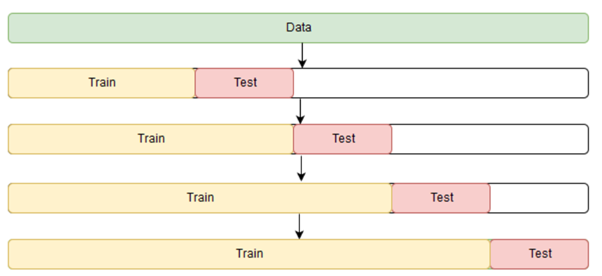

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

def timeseriesCVscore(w):
    # вектор ошибок
    errors = []
    values = data.values
    alpha, beta, gamma = w
    
    # задаём число фолдов для кросс-валидации
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # идем по фолдам кросс-валидации, на каждом обучаем модель, строим прогноз на отложенной выборке и считаем ошибку
    for train, test in tscv.split(values):
        # тут preds - все сглаженное + предсказания (т.е. надо обрезать под размер теста - [-len(test):])
        preds = HolterWinter(data=values[train], L = 24*7, alpha=alpha, beta=beta, gamma=gamma, m=len(test))
        error = mean_squared_error(preds[-len(test):], values[test])
        # print(error, alpha, beta, gamma)
        errors.append(error)
    # возвращаем усреднение
    return np.mean(np.array(errors))

In [ ]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [ ]:
%%time
data = df['ads'][:-128] # отложим часть данных для тестирования
# Минимизируем функцию потерь с ограничениями на параметры
# альтернативные method = L-BFGS-B, TNC, SLSQP, Powell, trust-constr
optimizer = minimize(timeseriesCVscore, x0=[0, 0, 0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

# Из оптимизатора берем оптимальное значение параметров
alpha, beta, gamma = optimizer.x
print(alpha, beta, gamma)

0.01566079833754958 0.0015031569400526838 0.22497803613380993
CPU times: user 3.5 s, sys: 1.29 ms, total: 3.5 s
Wall time: 3.5 s


In [ ]:
import time
# замеряем скорости сходимости оптимизаторов
for optimizer in ['L-BFGS-B', 'TNC', 'SLSQP', 'Powell', 'trust-constr']:
    try:
        start = time.time()
        print('\nОптимизатор:', optimizer, end=' ')
        data = df['ads'][:-128] # отложим часть данных для тестирования
        # Минимизируем функцию потерь с ограничениями на параметры
        optimizer = minimize(timeseriesCVscore, x0=[0, 0, 0], method=optimizer, bounds = ((0, 1), (0, 1), (0, 1)))

        # Из оптимизатора берем оптимальное значение параметров
        alpha, beta, gamma = optimizer.x
        print('\nalpha, beta, gamma:', alpha_final, beta_final, gamma_final)

        end = time.time()
        print('Скорость сходимости (сек)', round(end - start, 2))
    except:
        # часть из них почему-то выдает ошибки из-за ошибок кодирования
        pass


Оптимизатор: L-BFGS-B 
alpha, beta, gamma: 0.017382872735927535 0.0015562415517790251 0.21164582406792537
Скорость сходимости (сек) 4.96

Оптимизатор: TNC 
alpha, beta, gamma: 0.017382872735927535 0.0015562415517790251 0.21164582406792537
Скорость сходимости (сек) 17.92

Оптимизатор: SLSQP 
alpha, beta, gamma: 0.017382872735927535 0.0015562415517790251 0.21164582406792537
Скорость сходимости (сек) 0.18

Оптимизатор: Powell 

/usr/local/lib/python3.6/dist-packages/scipy/optimize/_minimize.py:522: RuntimeWarning: Method Powell cannot handle constraints nor bounds.
  RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_regression.py:254: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in double_scalars



Оптимизатор: trust-constr 
alpha, beta, gamma: 0.017382872735927535 0.0015562415517790251 0.21164582406792537
Скорость сходимости (сек) 31.47


Самый быстрый оказался SLSQP

In [ ]:
df['ads'].values[:-128]

array([49136, 46450, 46355, ..., 71807, 71959, 74223])

In [ ]:
preds = HolterWinter(data=df['ads'].values[:-128], L = 24*7, alpha=alpha, beta=beta, gamma=gamma, m=128)

In [ ]:
mean_squared_error(df['ads'].values[-128:], preds[-128:]) # абсолютные значения достаточно велики

75803087.88784015

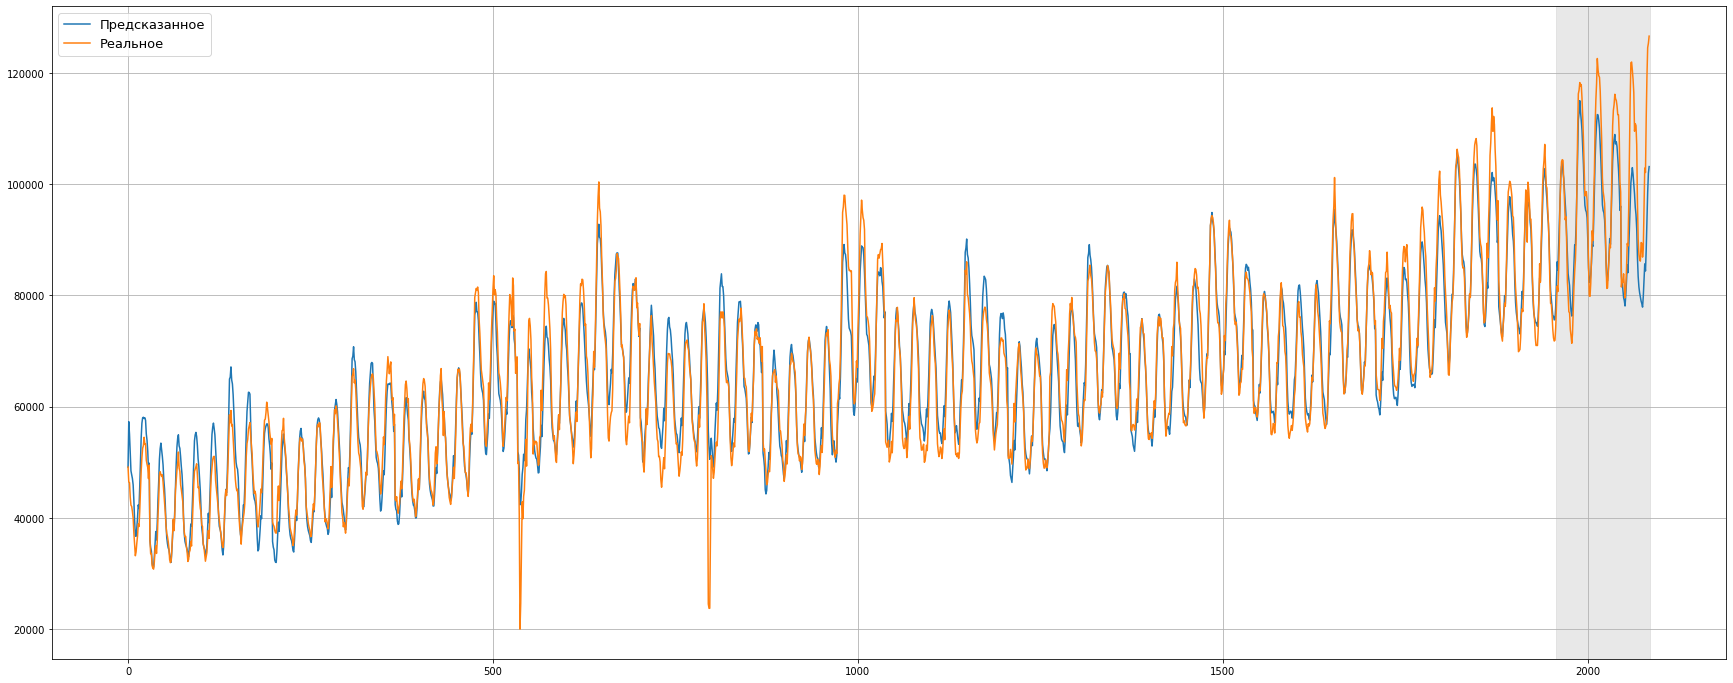

In [ ]:
plt.figure(figsize=(30, 12))
plt.plot(preds, label = "Предсказанное")
plt.plot(df['ads'].values, label = "Реальное")
# зона предсказания
plt.axvspan(len(df['ads'])-128, len(df['ads']), alpha=0.5, color='lightgrey')
plt.grid(True)
plt.axis('tight')
plt.legend(loc="best", fontsize=18);

Перебор различных значений сезонностей


In [ ]:
errors_per_L = []
params_per_L = []

In [ ]:
from tqdm import tqdm

for i in tqdm(range(1, 200)):
    data = df['ads'][:-128] # отложим часть данных для тестирования
    # Минимизируем функцию потерь с ограничениями на параметры
    # альтернативные method = L-BFGS-B, TNC, SLSQP, Powell, trust-constr
    optimizer = minimize(timeseriesCVscore, x0=[0, 0, 0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))
    # Из оптимизатора берем оптимальное значение параметров
    alpha, beta, gamma = optimizer.x
    preds = HolterWinter(data=df['ads'].values[:-128], L = 24*7, alpha=alpha, beta=beta, gamma=gamma, m=128)
    errors_per_L.append(mean_squared_error(df['ads'].values[-128:], preds[-128:]))
    params_per_L.append(optimizer.x)
    # print(alpha, beta, gamma)

100%|██████████| 199/199 [16:30<00:00,  4.98s/it]


In [ ]:
np.where(errors_per_L == min(errors_per_L))

(array([  137,   402,   543,   684,   825,   966,  1107,  1248,  1389,
         1530,  1671,  1812,  1953,  2094,  2235,  2376,  2517,  2658,
         2799,  2940,  3081,  3222,  3363,  3504,  3645,  3786,  3927,
         4068,  4209,  4350,  4491,  4632,  4773,  4914,  5055,  5196,
         5337,  5478,  5619,  5760,  5901,  6042,  6183,  6324,  6465,
         6606,  6747,  6888,  7029,  7170,  7311,  7452,  7593,  7734,
         7875,  8016,  8157,  8298,  8439,  8580,  8721,  8862,  9003,
         9144,  9285,  9426,  9567,  9708,  9849,  9990, 10131, 10272,
        10413, 10554, 10695, 10836, 10977, 11118, 11259, 11400, 11541,
        11682, 11823, 11964, 12105, 12246, 12387, 12528, 12669, 12810,
        12951, 13092, 13233, 13374, 13515, 13656, 13797, 13938, 14079,
        14220, 14361, 14502, 14643, 14784, 14925, 15066, 15207, 15348,
        15489, 15630, 15771, 15912, 16053, 16194, 16335, 16476, 16617,
        16758, 16899, 17040, 17181, 17322, 17463, 17604, 17745, 17886,
      

In [ ]:
alpha, beta, gamma = params_per_L[137]

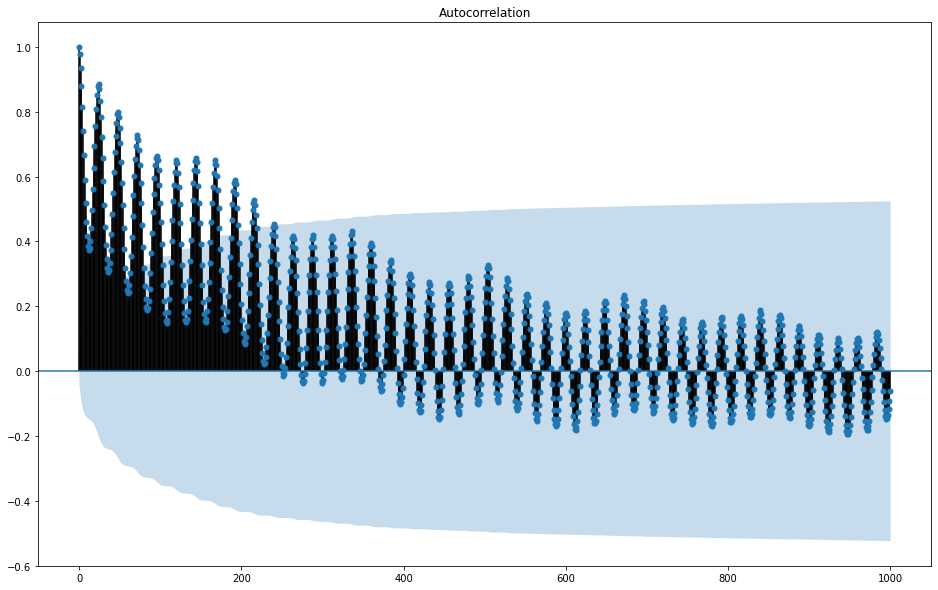

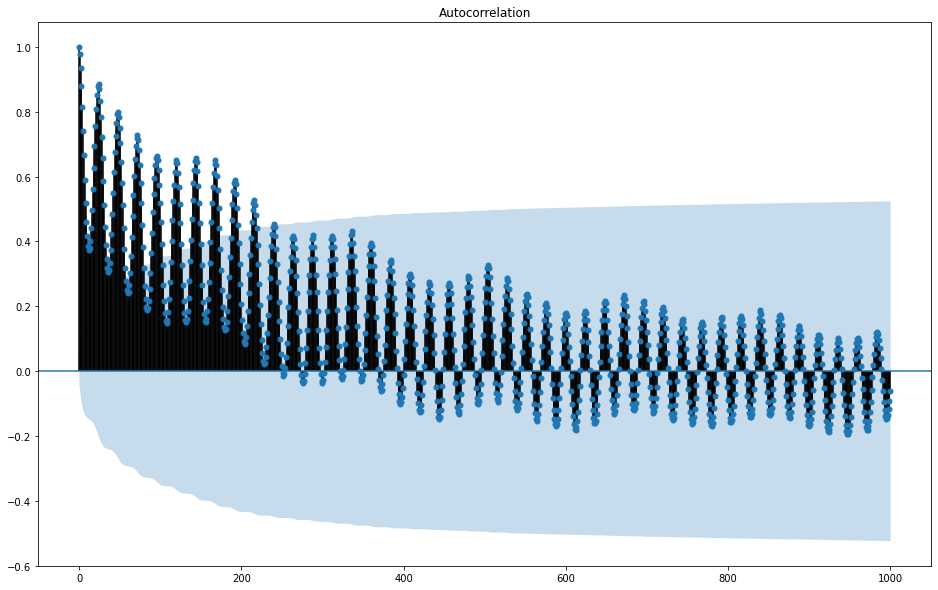

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))
smt.graphics.plot_acf(df['ads'], lags=1000, ax=ax)

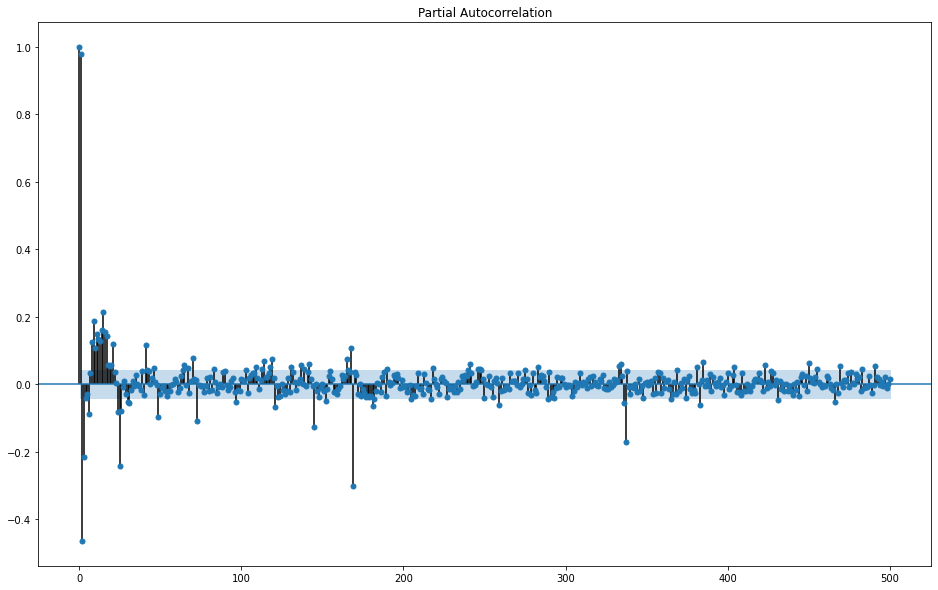

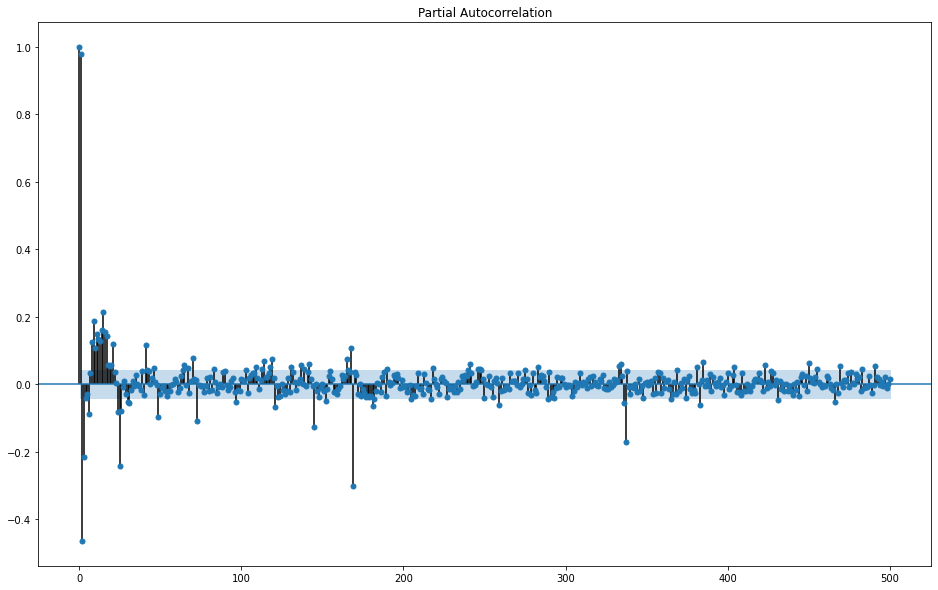

In [ ]:
fig, ax = plt.subplots(figsize=(16, 10))
smt.graphics.plot_pacf(df['ads'], lags=500, ax=ax)

В модель включен метод Брутлага для построения доверительных интервалов:

$\hat y_{max_x}=\ell_{x−1}+b_{x−1}+s_{x−T}+m⋅d_{t−T}$

$\hat y_{min_x}=\ell_{x−1}+b_{x−1}+s_{x−T}-m⋅d_{t−T}$

$d_t=\gamma∣y_t−\hat y_t∣+(1−\gamma)d_{t−T}$,

Где 

* $T$ - длина сезона
* $d$ - предсказанное отклонение

[тык](https://fedcsis.org/proceedings/2012/pliks/118.pdf)

In [ ]:
def HolterWinter_bounds(data, L, alpha, beta, gamma, m, scale):
    # находим изначальные сезонности
    season_num = int(len(data)/L)# кол-во cезонов
    seasonalities = {} # сами сезонности
    season_avgs = [] # их среднее
    # находим сезонное среднее
    season_avgs = [sum(data[L*i: L*i+L])/float(L) for i in range(season_num)]
    # находим начальные значения cезонности
    for i in range(L):
        avg_over_summ = 0.0
        for j in range(season_num):
            avg_over_summ += data[L*j+i] - season_avgs[j]
        seasonalities[i] = avg_over_summ / season_num
    # инициализируем массивы результирующих прогнозов, сгалженных, сезонных и трендовых (нужны в формулах на пред шагах)
    result = []
    smooth = []
    season = []
    trend = []
    deviation = []
    upper_bound = []
    lower_bound = []
    # пройдемся по всем данным + длинна предсказания m
    for i in range(len(data) + m):
        # инициализируем значения шага 0
        if i==0:
            smooth_val = data[0] # первое значения сглаживания
            trend_val = sum([(float(data[i+L] - data[i]) / L) for i in range(L)]) / L # первое значения тренда
            result.append(data[0]) # первая точка данных совпадает с исходной
            smooth.append(smooth_val) # добавляем первое значение сглаживание в массив трендов
            trend.append(trend_val) # добавляем первое значение тренда в массив трендов
            season.append(seasonalities[i%L]) # см mod L
            deviation.append(0)
            upper_bound.append(result[0] + scale*deviation[0])
            lower_bound.append(result[0] - scale*deviation[0])
            continue # завершаем первый шаг
        # выполняем прогноз, если вышли за пределы данных
        if i >= len(data):
            # текущее прогнозируемое значение t+1, t+2, ... (текущее m)
            curr_m = i - len(data) + 1
            result.append((smooth_val + curr_m*trend_val) + seasonalities[i%L])
            # в предсказаниях доверительный интервал будет расходиться
            deviation.append(1.01 * deviation[-1]) 
        else: # основной цикл вычисления параметров
            last_smooth_val = smooth_val
            smooth_val = alpha*(data[i] - seasonalities[i%L]) + (1 - alpha)*(smooth_val + trend_val) # обновляем lx
            trend_val = beta * (smooth_val - last_smooth_val) + trend_val*(1 - beta) # обновляем bx
            seasonalities[i%L] = gamma * (data[i] - smooth_val) + (1 - gamma)*seasonalities[i%L] # обновляем sx
            result.append(smooth_val + trend_val + seasonalities[i%L]) # записываем результат

            smooth.append(smooth_val)
            trend.append(trend_val)
            season.append(seasonalities[i%L])
            deviation.append(gamma*abs(data[i] - result[i]) + (1-gamma)*deviation[-1])
            # print(abs(data[i] - result[i])*gamma)
        # добавим доверительный интервал
        upper_bound.append(result[-1] + scale*deviation[-1]) 
        lower_bound.append(result[-1] - scale*deviation[-1])

    return result, upper_bound, lower_bound, deviation

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

def timeseriesCVscore(w):
    # вектор ошибок
    errors = []
    values = data.values
    alpha, beta, gamma = w
    
    # задаём число фолдов для кросс-валидации
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # идем по фолдам кросс-валидации, на каждом обучаем модель, строим прогноз на отложенной выборке и считаем ошибку
    for train, test in tscv.split(values):
        # тут preds - все сглаженное + предсказания (т.е. надо обрезать под размер теста - [-len(test):])
        preds, upper, lower, deviation = HolterWinter_bounds(data=values[train], L = 24*7, alpha=alpha, beta=beta, gamma=gamma, m=len(test), scale= 1.9)
        error = mean_squared_error(preds[-len(test):], values[test])
        # print(error, alpha, beta, gamma)
        errors.append(error)
    # возвращаем усреднение
    return np.mean(np.array(errors))

In [ ]:
%%time
data = df['ads'][:-128] # отложим часть данных для тестирования
# Минимизируем функцию потерь с ограничениями на параметры
# альтернативные method = L-BFGS-B, TNC, SLSQP, Powell, trust-constr
optimizer = minimize(timeseriesCVscore, x0=[0, 0, 0], method="L-BFGS-B", bounds = ((0, 1), (0, 1), (0, 1)))

# Из оптимизатора берем оптимальное значение параметров
alpha, beta, gamma = optimizer.x
print(alpha, beta, gamma)

0.01566080245186279 0.0015031570182760506 0.22497784529753764
CPU times: user 6.89 s, sys: 24.6 ms, total: 6.92 s
Wall time: 6.92 s


In [ ]:
optimizer.x

array([0.0156608 , 0.00150316, 0.22497785])

In [ ]:
preds, upper, lower, deviation = HolterWinter_bounds(data=df['ads'].values[:-128], L = 24*7, alpha=alpha, beta=beta, gamma=gamma, m=128, scale= 1.9)

In [ ]:
len(deviation)

2085

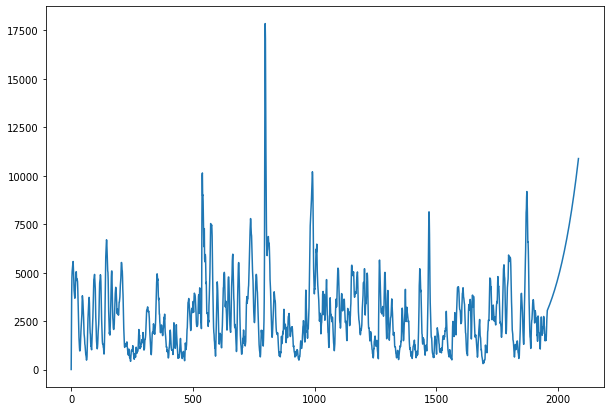

In [ ]:
pd.Series(deviation).plot(figsize=(10, 7))

(1800.0, 2200.0)

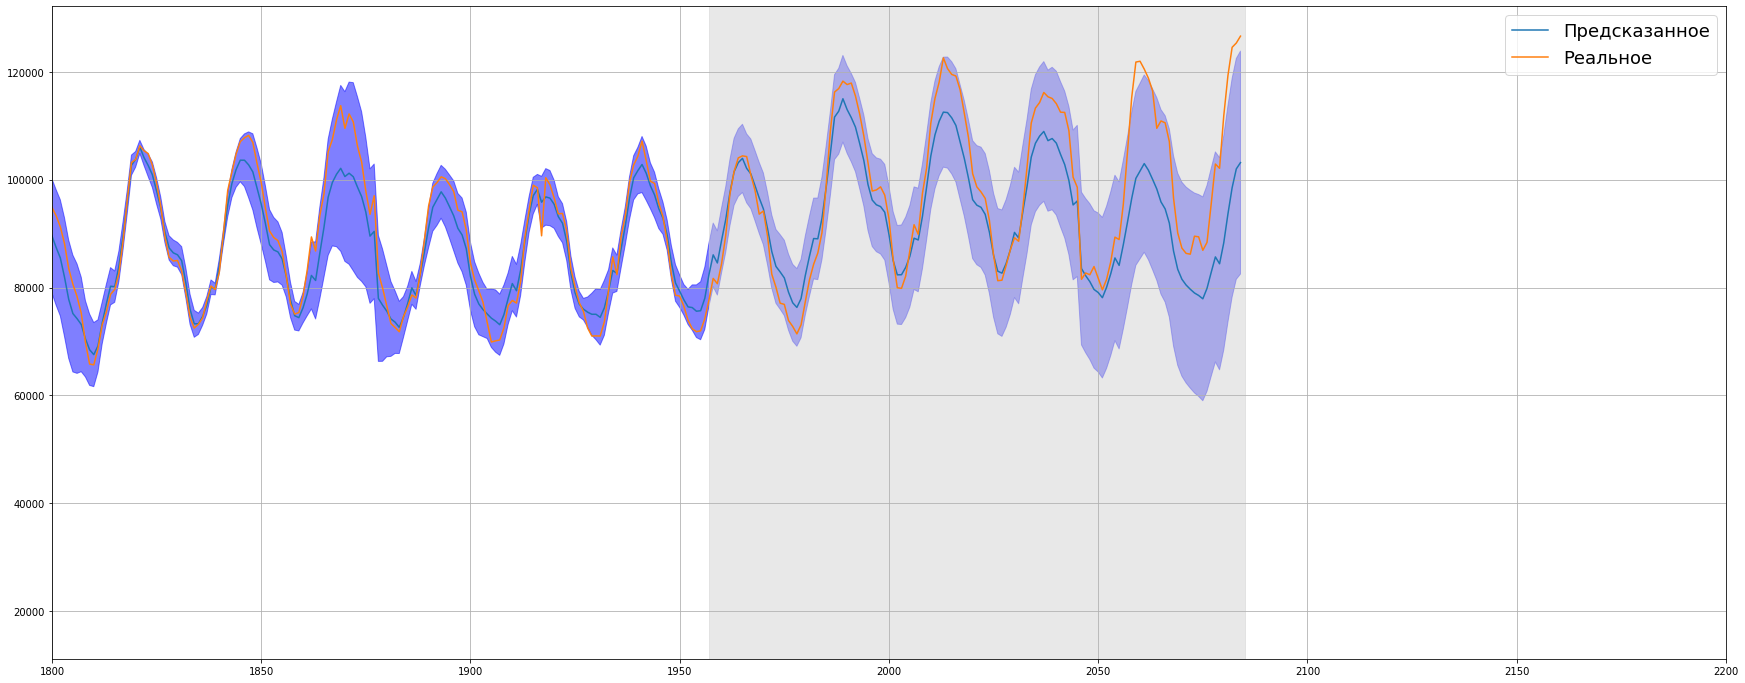

In [ ]:
plt.figure(figsize=(30, 12))
plt.plot(preds, label = "Предсказанное")
plt.plot(df['ads'].values, label = "Реальное")

# plt.plot(upper, "r--", alpha=0.5, label = "Верхний доверительный интервал")
# plt.plot(lower, "r--", alpha=0.5, label = "Нижний доверительный интервал")
plt.fill_between(x=range(0,len(df['ads'])), y1=lower, y2=upper, alpha=0.5, color = "blue")

# зона предсказания
plt.axvspan(len(df['ads'])-128, len(df['ads']), alpha=0.5, color='lightgrey')
plt.grid(True)
plt.axis('tight')
plt.legend(loc="best", fontsize=18);
plt.xlim(1800, 2200)

# SARIMA

In [ ]:
import matplotlib.pyplot as plt


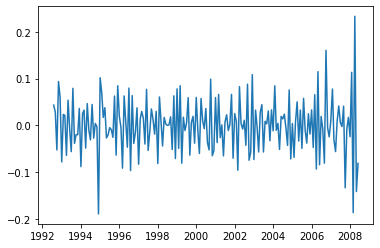

In [ ]:
plt.plot(boxcox(df['value'], -0.2).diff(1).diff(12))

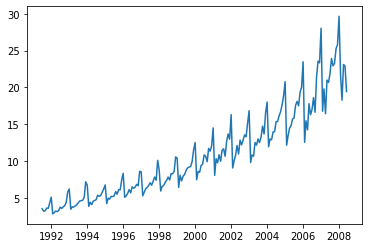

In [ ]:
from scipy.special import boxcox, inv_boxcox

plt.plot(inv_boxcox(boxcox(df['value'], 0), 0))

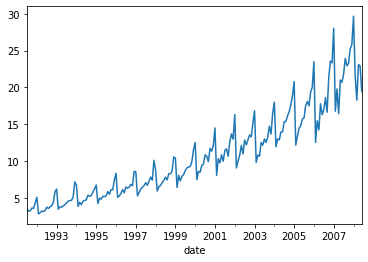

In [ ]:
df['value'].plot()

In [ ]:
!pip uninstall statsmodels
!pip install pmdarima

Found existing installation: statsmodels 0.12.2
Uninstalling statsmodels-0.12.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/statsmodels-0.12.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/statsmodels/*
Proceed (y/n)? y
  Successfully uninstalled statsmodels-0.12.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 30.3 MB/s 
     |████████████████████████████████| 9.8 MB 71.8 MB/s 


In [ ]:
from pmdarima.arima import auto_arima

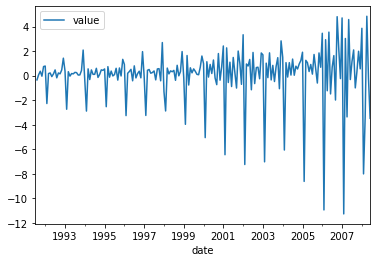

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.head()
df[:].diff(1).plot()

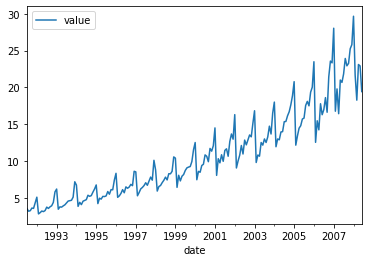

In [ ]:
df.plot()

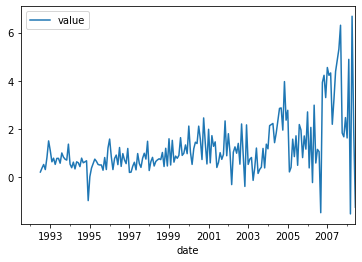

In [ ]:
df[:].diff(12).plot()

In [ ]:
len(df)

204

13

In [ ]:
model = auto_arima(boxcox(df['value'], -0.2).diff(1).diff(12).dropna(), start_p=0, start_q=0, test='adf', max_d=4, max_q=4, m=12,
           start_P=0, seasonal=True, error_action ='ignore', supress_warnings=True, trace=True)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=-562.362, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-541.283, Time=0.07 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-614.248, Time=0.24 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-667.964, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-543.273, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-638.779, Time=0.08 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-670.894, Time=0.52 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-647.841, Time=0.37 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=-675.676, Time=1.32 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=-665.908, Time=1.14 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=-672.196, Time=0.67 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=-667.983, Time=1.28 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=-582.384, Time=0.77 sec
 ARIMA(1,0,1)(2,0,1)[12] intercept   : AIC=-674.917, Time=1.49 sec
 ARIMA(0,0,2)(2,0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  191
Model:             SARIMAX(0, 0, 1)x(2, 0, 1, 12)   Log Likelihood                 343.412
Date:                            Tue, 11 Oct 2022   AIC                           -676.823
Time:                                    17:10:33   BIC                           -660.562
Sample:                                08-01-1992   HQIC                          -670.237
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7857      0.047    -16.803      0.000      -0.877      -0.694
ar.S.L12       0.1498      0.168      0.893      0.372      -0.179       0.479
ar.S.L24      -0.2671      0.087     -3.078      0.002      -0.437      -0.097
ma.S.L12      -0.6121      0.155     -3.955      0.000      -0.915      -0.309
sigma2         0.0015      0.000     10.812      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.83   Jarque-Bera (JB):                 6.87
Prob(Q):                              0.36   Prob(JB):                         0.03
Heteroskedasticity (H):               1.06   Skew:                            -0.30
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
fitted, confint = model.predict(n_periods=24, return_conf_int=True)

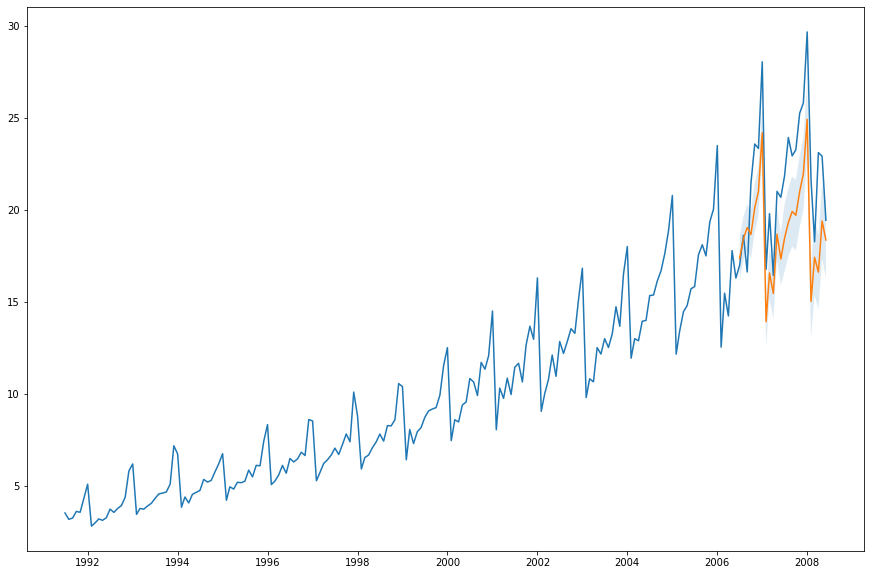

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.plot(df)
idx = pd.date_range(df.index[-24], periods=24, freq='MS')
plt.plot(pd.Series(fitted, index=idx))
plt.fill_between(idx, confint[:, 0], confint[:, 1], alpha=.15)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(df.value.values[-24:], fitted)

0.13786562206104716

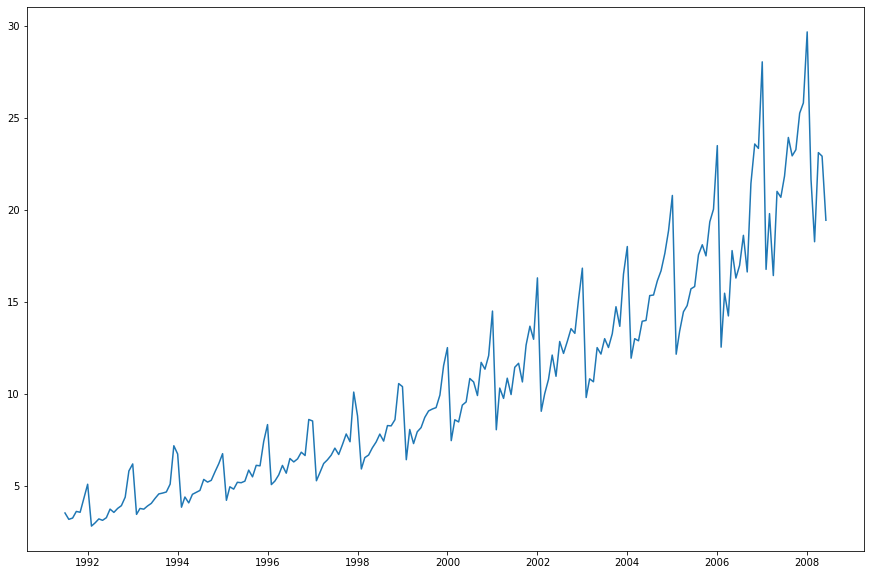

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.plot(df)
idx = pd.date_range(df.index[-24], periods=24, freq='MS')
plt.plot(pd.Series(inv_boxcox(fitted, -0.2) + boxcox(df['value'], -0.2)[-1]+ boxcox(df['value'], -0.2)[-12], index=idx))
# plt.fill_between(idx, confint[:, 0], confint[:, 1], alpha=.15)

In [ ]:
mean_absolute_percentage_error(df.value.values[-24:], inv_boxcox(fitted, -0.2))

0.10659664312186727